# Project Data Analysis: E-Commerce Public Dataset

In [3]:
# mount drive to access the csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Business Questions



1.   What are the monthly revenue trends from 2016 to 2018?
2.   Which product categories are the best and worst performers in terms of sales revenue?
3. Which product categories receive the highest and lowest customer reviews?
4. What is the geographic distributions of our customers?
5. How are our customers distributed based on their payment type? And what is the average installments from customers who used credit card?
6. What is the distribution of our order status and how many percent is the cancelation rate over all orders?
7. What is the delivery time spread of our delivered-orders?



## Import All Packages/Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# load customers data
customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# load orders data
orders_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# load order reviews data
order_reviews_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
# load order items data
order_items_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
# load order payment data
order_pay_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv")
order_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
# load product translation data
product_translate = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv")
product_translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
# load product data
product_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- There are total of 7 dataframes out of 9 dataframes used in this project
- Product names are originally in Spanish but they could be translated using provided translation in 'product_translate_df'
- There are wrongly named columns in 'product_df': product_name_lenght and product_description_lenght. But it seems like we won't be needing those columns anyway to answer our questions.

### Assessing Data

#### Customers Dataframe

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
print("Customer duplicate sum:", customers_df.duplicated().sum())

Customer duplicate sum: 0


In [16]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


We can't really infer anything based on the customer_id because they are unique. However, we could see from customer_unique_id that the most purchased made by a customer is 17 times. Also, city with the highest purchase amount is sao paulo.

#### Orders Dataframe

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


We could see that some columns are assigned with the wrong data types. They are column 3, 4, 5, 6, and 7. They are supposed to be 'datetime' but instead they are assigned with 'object'.

In [18]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


We could see that there are some null values in orders dataframe. However, looking at the columns with missing values' names, it could be due to:
- Orders are not approved yet by the sellers thus haven't been delivered to the carriers
- Orders haven't been delivered to the carriers thus haven't been delivered to customers
- Orders haven't been delivered to the customers
- Orders still in the 'created' status, or canceled, or marked unavailable

In [19]:
print("Orders duplicate sum:", orders_df.duplicated().sum())

Orders duplicate sum: 0


In [20]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Order Reviews Dataframe

In [21]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


The review_creation_date's dtype should be assigned as 'datetime' instead of 'object'.

In [22]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Order reviews dataframe also has some null values. It could be due to the flexibility to put reviews without giving comment title or/and comment message. Fortunately, we are not going to need those columns so we could handle it by dropping the columns during cleaning process.

In [23]:
print("Order reviews duplicate sum:", order_reviews_df.duplicated().sum())

Order reviews duplicate sum: 0


In [24]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


We could see that from all orders the average review score is 4.086 with minimum 1 and max 5.

#### Order Items Dataframe

In [27]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


The shipping_limit_date's dtype should be 'datetime' instead of 'object'.

In [28]:
print("Order items duplicate sum:", order_items_df.duplicated().sum())

Order items duplicate sum: 0


In [29]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Based on the order_id we could see that:
- The most purchase a customer made is 21 items
- The most purchased product had been purchased for 527 times
- Prices for every orders have an average of 120.65 with the lowest price 0.85 and the highest 6735.
- Freight values for every orders have an average of 19.99 with the lowest value 0 and the highest 409.68. The 0 could be caused by cancelation, unavailability, and 'created' status.

#### Order Payment Dataframe

In [30]:
order_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
print("Order payment duplicate sum:", order_pay_df.duplicated().sum())

Order payment duplicate sum: 0


In [32]:
order_pay_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Most customers used credit cards as their payment method. On average, each customer spent 154.1, with a minimum spending of 0 and a maximum of 13,664. Some customers chose to split their payments into installments, with an average of 2.85 installments, a minimum of 0, and a maximum of 24 installments. This is a bit odd for payment_installments to be 0, it might be mistakenly input values.

In [33]:
print(orders_df['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


The minimum spending of 0 may suggest that the payment was either never made or has not been processed yet. This could be due to the order being canceled, marked as unavailable, or still in the 'created' status, indicating it has not yet been processed.

#### Product Translate Dataframe

In [34]:
product_translate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [35]:
print("Product translate duplicate sum:", product_translate.duplicated().sum())

Product translate duplicate sum: 0


There is no problem with product translate dataframe.

#### Product Dataframe

In [36]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


The product dataframe contains many null values, and unfortunately, there is no other dataframe that provides the product_category_name corresponding to the product_id. However, if the 610 missing values are not from the same row, there may be an opportunity to handle the missing values by assigning the product name based on the information from other columns.

In [38]:
print("Product duplicate sum:", product_df.duplicated().sum())

Product duplicate sum: 0


#### **Insight:**
**orders_df**:
- missing values:  order_appproved_at (160), order_delivered_carrier_date (1783), order_delivered_customer_date (2965)
- data type:  column order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date should be 'datetime' instead of 'object'

**order_reviews_df**:
- missing values: review_comment_title (87656),
review_comment_message	(58247)
- data type: column review_creation_date should be 'datetime' instead of 'object'

**order_items_df**:
- inaccurate data type: shipping_limit_date
- inaccurate value: freight_value's minimum is 0, could be caused by cancelation, unavailability, or 'created' status

**order_pay_df**:
- inaccurate_value: payment_value's minimum is 0, could be caused by cancelation, unavailability, or 'created' status
- inaccurate value: payment_installments' minimum is 0 which is unlikely as it means that the order is not being paid whatsoever

**product_df**:
- missing values: product_category_name	(610),
product_name_lenght	(610),
product_description_lenght	(610),
product_photos_qty	(610),
product_weight_g	(2),
product_length_cm	(2),
product_height_cm	(2),
product_width_cm	(2)




### Cleaning Data

#### Orders Dataframe

In [42]:
# changing data type
datetime_orders_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_orders_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [43]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [44]:
# handling missing values
orders_df[orders_df.order_approved_at.isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [45]:
print(orders_df[orders_df['order_approved_at'].isna()]['order_status'].unique())

['canceled' 'delivered' 'created']


We know that the missing values for order_approved_at consists of order_status with either canceled, delivered, or created. We established that canceled means that the purchase is never made thus never approved and created means it hasn't been approved yet. However, it is odd for delivered to not have approved time.

In [46]:
orders_df[orders_df.order_status == 'delivered'].isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


In [47]:
orders_df[orders_df.order_status == 'delivered'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


We could see that there are 14 of delivered orders without order_approved_at values. Although we need the column to answer the question number 2, 14 out of 96478 is only 0.0145%. Therefore, we will not use the 14 'delivered' rows with null order_approved_at.

In [48]:
orders_df[orders_df.order_status == 'canceled'].isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,141
order_delivered_carrier_date,550
order_delivered_customer_date,619
order_estimated_delivery_date,0


For the 'canceled' orders, we will just leave them as they are since it is within the nature of the data to have null values. In fact, the null values carry meaning rather than just being missing. However, we could also choose to use the columns without certain null values in EDA.

#### Order Reviews Dataframe

Order reviews has a lot of missing values in the column review_comment_title and review_comment_message. However, in this project they are not necessary. So, we will handle the null values by dropping those columns.

In [49]:
# handling missing values
order_reviews_df = order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'])

In [50]:
# changing data type
datetime_reviews_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_reviews_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [51]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


From the info we could see that we already resolved the missing values and false data type problem. There are only 5 columns left and the data type for column 3 and 4 are changed to datetime.

#### Order Items Dataframe

In [148]:
# handling inaccurate data type
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               112650 non-null  object        
 1   order_item_id          112650 non-null  int64         
 2   product_id             112650 non-null  object        
 3   seller_id              112650 non-null  object        
 4   shipping_limit_date    112650 non-null  datetime64[ns]
 5   price                  112650 non-null  float64       
 6   freight_value          112650 non-null  float64       
 7   product_category_name  111023 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.9+ MB


In [53]:
# handling inaccurate values
order_items_df[order_items_df.freight_value == 0].count()

,0
order_id,383
order_item_id,383
product_id,383
seller_id,383
shipping_limit_date,383
price,383
freight_value,383


There are total of 383 columns with 0 in freight_value. Now, we will see if they are a part of order_status that is either canceled, created, or unavailable.

In [54]:
orders_merged_order_items_df = order_items_df.merge(orders_df, on='order_id', how='inner')
freight_zero_df = orders_merged_order_items_df[orders_merged_order_items_df['freight_value'] == 0]
freight_zero_order_status = freight_zero_df[['order_id', 'freight_value', 'order_status']]

print(freight_zero_order_status['order_status'].value_counts())

order_status
delivered    381
shipped        2
Name: count, dtype: int64


In [55]:
print(orders_merged_order_items_df['order_status'].value_counts())

order_status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64


We could confirm that the order_items_df has all of the order_status but 'created'. We could also confirm that freight_value == 0 doesn't mean it is canceled or unavailable. Therefore, the freight_value == 0 rows are retained since they represent free delivery instead of inaccurate values.

#### Order Payment Dataframe

We know that there are payment_value with 0 values. First we will see if the first assumption that they are inaccurate values or them being 'canceled' order are true.

In [56]:
orders_merged_order_pay_df = order_pay_df.merge(orders_df, on='order_id', how='inner')
pay_zero_df = orders_merged_order_pay_df[orders_merged_order_pay_df['payment_value'] == 0]
pay_zero_status = pay_zero_df[['order_id', 'payment_value', 'order_status']]

print(pay_zero_status['order_status'].value_counts())

order_status
delivered    4
canceled     3
shipped      2
Name: count, dtype: int64


Here, we see that not all orders with 0 payment_value are canceled.

In [57]:
orders_merged_order_pay_df['order_status'].value_counts()

,count
order_status,
delivered,100756
shipped,1166
canceled,664
unavailable,649
invoiced,325
processing,319
created,5
approved,2


Based on the count for each order_status, we know that it is possible for an order to have 0 payment_value while being 'canceled' or 'unavailable'. Now, we will see all data that has 0 payment_value.

In [58]:
orders_merged_order_pay_df[orders_merged_order_pay_df['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaT,2017-05-18
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaT,NaT,NaT,2018-09-10
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaT,2017-05-18
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaT,NaT,NaT,2018-09-11
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29


In [59]:
orders_merged_order_pay_df['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


After reviewing all records with a payment_value of 0, we found that six entries had a payment_type of 'voucher,' while the remaining three were labeled as 'not_defined.' Notably, all entries with 'not_defined' had an order_status of 'canceled.' Additionally, when counting the total occurrences of each payment_type, we confirmed that only three records were categorized as 'not_defined.' This suggests that 'not_defined' likely indicates orders that were canceled before a payment type could be assigned.


In [60]:
orders_merged_order_pay_df[orders_merged_order_pay_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69,5e5794daaa13f73e2f1cdb4114529843,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,2018-05-16
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06


Since it is unlikely for payment_installments to have 0 as its value, we will change the value. It will be changed to the median value of credit_card's payment_installments.

In [61]:
zero_installments = order_pay_df[order_pay_df['payment_installments'] == 0]

median_installments = order_pay_df.groupby('payment_type')['payment_installments'].median()

order_pay_df.loc[order_pay_df['payment_installments'] == 0, 'payment_installments'] = \
    order_pay_df.loc[order_pay_df['payment_installments'] == 0, 'payment_type'].map(median_installments)

print(order_pay_df.loc[zero_installments.index])

                               order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     3          58.69  
79014                     3         129.94  


Other than changing the zero installments, we can conclude that the order payment dataframe is accurate, and the issue identified during the assessment phase is simply a reflection of the data's characteristics.

#### Product Dataframe

In [62]:
# change category name to english
category_translation = dict(zip(product_translate['product_category_name'],
                                 product_translate['product_category_name_english']))

product_df['product_category_name'] = product_df['product_category_name'].map(category_translation)

product_df[product_df['product_category_name'].notna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [63]:
# handling missing value
product_df[product_df['product_category_name'].isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


Next, we will see the data further to find out whether filling the null values based on their weight, length, height, and width would be possible.

In [64]:
duplicates = product_df[product_df.duplicated(subset=['product_category_name', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], keep=False)]

duplicate_groups = duplicates.groupby(['product_category_name','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']).size()
print(duplicate_groups)

product_category_name  product_weight_g  product_length_cm  product_height_cm  product_width_cm
air_conditioning       150.0             20.0               8.0                13.0                3
                       200.0             20.0               8.0                13.0                2
                                         21.0               8.0                17.0                3
art                    100.0             16.0               5.0                11.0                2
                       350.0             16.0               6.0                11.0                2
                                                                                                  ..
watches_gifts          850.0             35.0               17.0               17.0                2
                                         48.0               16.0               35.0                3
                       900.0             23.0               15.0               19.0             

We could see that some products indeed have the exact same category name, weight, length, height, and width.

In [65]:
specific_group = product_df[
    (product_df['product_weight_g'] == 30000.0) &
    (product_df['product_length_cm'] == 60.0) &
    (product_df['product_height_cm'] == 60.0) &
    (product_df['product_width_cm'] == 60.0)
]
print(specific_group)

                             product_id product_category_name  \
3576   d239ed6ed6dabbcbfd8a3b776e1ca50c            housewares   
5955   63c4a70e0a12b4bd9475fca9e9937e76                  auto   
6198   9ba9e0b736763a4badc2d630822c0a1c            housewares   
20664  64b4fdd3c24f7e8c49133cad3718bfc4       furniture_decor   
21603  1bad1f17e229af04d11a788ed2b3553f   musical_instruments   

       product_name_lenght  product_description_lenght  product_photos_qty  \
3576                  59.0                      1199.0                10.0   
5955                  44.0                       350.0                 1.0   
6198                  59.0                      1403.0                10.0   
20664                 63.0                      1253.0                 8.0   
21603                 60.0                       774.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
3576            30000.0               60.0               60.0   
5955      

But, after closer look on some data that were grouped by their weight, length, height, and width, we see that they have different product_category_name. Also, they have different product_name_length, product_description_length, and product_photos as well.

---

Conclusion for product_df, we can't fill the missing value for category name by using mismatch/deriving from other columns' same values method. There is a possibility that clustering would help for that problem but we're not doing that in this project. So, for the third business question we will only include reviews with non null product_category_name.

####**Insight:**
**orders_df**
- Inaccurate data type has been resolved
- A total of 14 orders marked as 'delivered' have missing values in the 'approved_at' column, representing just 0.0145% of the total 'delivered' orders. These rows will be excluded from further analysis
- Null values in rows with 'canceled' status will remain as they are, as they provide meaningful information about the data's nature

**order_reviews_df**
- Inaccurate data type and missing value problems have been resolved.

**order_items_df**
- Inaccurate data type has been resolved.
- Rows with a freight_value of 0 do not indicate errors but represent free deliveries, consistent with the data's nature

**order_pay_df**
- Rows with a payment_value of 0 reflect the dataset's characteristics, some orders were paid using vouchers, while others were canceled before a payment method was defined. These are not inaccuracies.

**product_df**
- Columns with incorrect or irrelevant names are retained since they will not be used in this project
- Missing values in the product_category_name column could not be resolved by matching product dimensions (weight, length, height, and width). Instead, a subset of the DataFrame containing only product_id and non-null product_category_name values has been created for use in the third question.

## Exploratory Data Analysis (EDA)

### **Question 1**: What are the monthly revenue trends from 2016 to 2018?

In [151]:
monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

print(monthly_orders_df)

   order_purchase_timestamp  order_count     revenue
0                   2016-09            2      132.39
1                   2016-10          308    51068.92
2                   2016-11            0        0.00
3                   2016-12            1       10.90
4                   2017-01          789   129895.32
5                   2017-02         1733   262013.86
6                   2017-03         2641   398117.44
7                   2017-04         2391   392595.36
8                   2017-05         3660   549226.84
9                   2017-06         3217   456867.47
10                  2017-07         3969   536906.96
11                  2017-08         4293   606026.98
12                  2017-09         4243   665047.38
13                  2017-10         4568   697457.32
14                  2017-11         7451  1055072.10
15                  2017-12         5624   773574.02
16                  2018-01         7220   993701.49
17                  2018-02         6694   889

The lowest recorded revenue was 0 in November 2016 due to no orders being placed that month. In contrast, the highest revenue, totaling 1,055,072.10, occurred exactly a year later in November 2017. Additionally, the number of orders during the first four months was significantly lower compared to the rest, except for the final month, which was a sharp decline from 6,452 orders to just one.

### **Question 2**: Which product categories are the best and worst performers in terms of sales revenue?

#### Explore order_items_df and product_df

In [66]:
filtered_product_df = product_df[product_df['product_category_name'].notna()].copy()
filtered_product_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

filtered_product_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [67]:
product_category_mapping = product_df.set_index('product_id')['product_category_name'].to_dict()
order_items_df['product_category_name'] = order_items_df['product_id'].map(product_category_mapping)

order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [150]:
order_items_df['month_year'] = order_items_df['shipping_limit_date'].dt.to_period('M').astype(str)

total_price_per_month = order_items_df.groupby('month_year')['price'].sum().reset_index()
total_price_per_month.columns = ['Month-Year', 'Total Price']

print(total_price_per_month)

   Month-Year  Total Price
0     2016-09       194.47
1     2016-10     49580.55
2     2016-12        10.90
3     2017-01     80124.74
4     2017-02    245982.01
5     2017-03    343242.60
6     2017-04    308148.32
7     2017-05    505655.46
8     2017-06    469001.05
9     2017-07    465282.10
10    2017-08    560093.34
11    2017-09    617046.12
12    2017-10    658020.23
13    2017-11    883351.63
14    2017-12    898920.98
15    2018-01    845279.18
16    2018-02    819228.85
17    2018-03   1030527.84
18    2018-04    958729.70
19    2018-05   1084358.55
20    2018-06    870736.84
21    2018-07    811132.08
22    2018-08   1072147.70
23    2018-09     14502.50
24    2020-02       145.98
25    2020-04       199.98


In [68]:
order_items_df.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False)

,order_id
product_category_name,
bed_bath_table,9417
health_beauty,8836
sports_leisure,7720
computers_accessories,6689
furniture_decor,6449
...,...
arts_and_craftmanship,23
la_cuisine,13
cds_dvds_musicals,12


In [69]:
agg_data_order_items = order_items_df.groupby(by='product_category_name').agg({
    "order_id" : "nunique",
    "price" : ["sum", "max", "min", "mean", "std"]
}).sort_values(('price','sum'), ascending=False)

In [70]:
agg_data_order_items.head(10)

order_id       price                             \
                       nunique         sum      max   min        mean   
product_category_name                                                   
health_beauty             8836  1258681.34  3124.00  1.20  130.163531   
watches_gifts             5624  1205005.68  3999.90  8.99  201.135984   
bed_bath_table            9417  1036988.68  1999.98  6.99   93.296327   
sports_leisure            7720   988048.97  4059.00  4.50  114.344285   
computers_accessories     6689   911954.32  3699.99  3.90  116.513903   
furniture_decor           6449   729762.49  1899.00  4.90   87.564494   
cool_stuff                3632   635290.85  3109.99  7.00  167.357969   
housewares                5884   632248.66  6735.00  3.06   90.788148   
auto                      3897   592720.11  2258.00  3.49  139.957523   
garden_tools              3518   485256.46  3930.00  6.35  111.630196   

                                   
                              std  
product_category_name              
health_beauty          179.499147  
watches_gifts          256.742470  
bed_bath_table          82.128028  
sports_leisure         162.471635  
computers_accessories  169.974919  
furniture_decor         88.832037  
cool_stuff             200.090161  
housewares             141.533996  
auto                   211.465655  
garden_tools           200.534192

The best performing product in terms of revenue is health_beauty with 1258681.34, which could be caused by the fact that it is primary needs. However, followed in second, fourth, and fifth, they are not considered primary, this suggests that pricing could also affect the revenue.

In [71]:
agg_data_order_items.tail(10)

order_id    price                              \
                           nunique      sum     max     min        mean   
product_category_name                                                     
fashio_female_clothing          39  2803.64  198.90   19.90   58.409167   
fashion_sport                   27  2119.51  225.00   24.99   70.650333   
la_cuisine                      13  2054.99  389.00   24.00  146.785000   
arts_and_craftmanship           23  1814.01  289.49    9.80   75.583750   
diapers_and_hygiene             27  1567.59  139.89   25.00   40.194615   
flowers                         29  1110.04   65.90   15.60   33.637576   
home_comfort_2                  24   760.27  219.99   12.90   25.342333   
cds_dvds_musicals               12   730.00   65.00   45.00   52.142857   
fashion_childrens_clothes        8   569.85  110.00   39.99   71.231250   
security_and_services            2   283.29  183.29  100.00  141.645000   

                                      
                                 std  
product_category_name                 
fashio_female_clothing     39.173717  
fashion_sport              49.175602  
la_cuisine                 79.373941  
arts_and_craftmanship      73.997815  
diapers_and_hygiene        25.081963  
flowers                    16.737759  
home_comfort_2             41.674169  
cds_dvds_musicals           9.944903  
fashion_childrens_clothes  31.831886  
security_and_services      58.894924

The worst performing product is security and services. As we could see the number of orders for this product is only two which means lower in demand. The same goes for the second worst, fashion childrens clothes with only 8 purchases.

### **Question 3**: Which product categories receive the highest and lowest customer reviews?

#### Explore order_reviews_df

In [72]:
order_reviews_df.groupby(by='review_score').review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


A significant number of reviews, amounting to 56910, have a 5-star rating. The smallest group of reviews, totaling 3114, received a 2-star rating. The review with the lowest score has a total of 11282 reviews.

#### Explore order_items_df, product_df, and order_reviews_df

In [73]:
order_item_reviews_df = pd.merge(
    left = order_items_df,
    right = order_reviews_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
order_item_reviews_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02,2017-03-03 10:54:59


In [74]:
order_item_reviews_df.groupby(by='product_category_name').agg({
    "order_id" : "nunique" ,
    "review_score" : ["max", "min", "mean", "std"]
}).sort_values(('review_score','mean'), ascending=False)

order_id review_score                         
                           nunique          max  min      mean       std
product_category_name                                                   
cds_dvds_musicals               12          5.0  3.0  4.642857  0.633324
fashion_childrens_clothes        8          5.0  1.0  4.500000  1.414214
books_general_interest         512          5.0  1.0  4.446266  1.123460
costruction_tools_tools         97          5.0  1.0  4.444444  1.117780
flowers                         29          5.0  1.0  4.419355  1.088552
...                            ...          ...  ...       ...       ...
fashion_male_clothing          112          5.0  1.0  3.641221  1.700989
home_comfort_2                  24          5.0  1.0  3.629630  1.644294
office_furniture              1273          5.0  1.0  3.493183  1.532888
diapers_and_hygiene             27          5.0  1.0  3.256410  1.551196
security_and_services            2          4.0  1.0  2.500000  2.121320

[71 rows x 5 columns]

The product category with the highest average review score is "cds_dvds_musicals," which has 12 purchases and an average score of 4.6, with a maximum score of 5 and a minimum of 3. On the other hand, the category with the lowest average review score is "security_and_services," with 2 purchases, an average score of 2.5, a maximum score of 4, and a minimum score of 1.

In [75]:
correlation = order_item_reviews_df[['price', 'freight_value', 'review_score']].corr()
print(correlation)

                  price  freight_value  review_score
price          1.000000       0.414349     -0.003941
freight_value  0.414349       1.000000     -0.036179
review_score  -0.003941      -0.036179      1.000000


- None of the variables show strong correlations with review scores, implying that factors such as price and freight value do not significantly influence customer satisfaction or reviews.
- The moderate correlation between price and freight value could indicate a business pattern where more expensive items tend to have higher shipping costs, but it's not a strict rule.

### **Question 4**: What is the geographic distributions of our customers?

#### Explore customers_df

In [76]:
# group by city
customers_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False)

,customer_unique_id
customer_city,
sao paulo,14984
rio de janeiro,6620
belo horizonte,2672
brasilia,2069
curitiba,1465
...,...
ibertioga,1
ibiajara,1
ibiara,1


In [77]:
# group by state
customers_df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False)

,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882
SC,3534
BA,3277
DF,2075
ES,1964


The results show that customers are unevenly distributed across cities and states. The majority of customers, 14,984 in total, are from Sao Paulo city, while some cities have only a single customer. At the state level, most customers are located in SP, whereas only 45 are from RR.

### **Question 5**: How are our customers distributed based on their payment type? And what is the average installments from customers who used credit card?

#### Explore order_pay_df

In [78]:
order_pay_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853407,154.100380
std,NaN,0.706584,NaN,2.687022,217.494064
min,NaN,1.000000,NaN,1.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [79]:
order_pay_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [80]:
order_pay_df.groupby(by='payment_type').agg({
    "order_id" : "nunique",
    "payment_installments" : ["max", "min", "mean", "std"]
}).sort_values(('payment_installments','mean'), ascending=False)

order_id payment_installments                        
              nunique                  max min      mean       std
payment_type                                                      
credit_card     76505                   24   1  3.507234  2.850935
boleto          19784                    1   1  1.000000  0.000000
debit_card       1528                    1   1  1.000000  0.000000
not_defined         3                    1   1  1.000000  0.000000
voucher          3866                    1   1  1.000000  0.000000

There are four different payment type with the majority of customers chose credit card as their payment method with total of 76505 purchase and an average of 3.5 installments.

In [81]:
order_pay_df[order_pay_df['payment_type']=='credit_card'].groupby(by='payment_installments').order_id.nunique().sort_values(ascending=False)

,order_id
payment_installments,
1,25407
2,12389
3,10445
4,7088
10,5315
5,5234
8,4253
6,3916
7,1623


Most customers had single installment with total of 25407 purchases. Meanwhile, 22 and 23 installments only had one purchase each.

### **Question 6**: What is the distribution of our order status and how many percent is the cancelation rate over all orders? and **Question 7**: What is the delivery time spread of our delivered-orders?

#### Explore orders_df

In [82]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/86400)

In [83]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.517548
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000


In [84]:
orders_df.groupby(by='order_status').customer_id.nunique().sort_values(ascending=False)

,customer_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [85]:
orders_df.groupby(by='order_status').agg({
    "order_id" : "nunique" ,
    "delivery_time" : ["max", "min", "mean", "std"]
})

order_id delivery_time                           
              nunique           max  min       mean        std
order_status                                                  
approved            2           NaN  NaN        NaN        NaN
canceled          625          36.0  7.0  20.500000  13.187115
created             5           NaN  NaN        NaN        NaN
delivered       96478         210.0  1.0  12.517052   9.550133
invoiced          314           NaN  NaN        NaN        NaN
processing        301           NaN  NaN        NaN        NaN
shipped          1107           NaN  NaN        NaN        NaN
unavailable       609           NaN  NaN        NaN        NaN

- A total of 625 canceled orders had already been delivered to customers, with delivery times ranging from a minimum of 7 days to a maximum of 36 days, and an average of 20.5 days.
- For successfully delivered orders, delivery times ranged from as short as 1 day to as long as 210 days, with an average of 12.5 days. It should be noted that the 210-day delivery time could potentially be a data error or an outlier.


In [86]:
filtered_orders = orders_df[
    ((orders_df['order_status'] == 'delivered') |
     ((orders_df['order_status'] == 'canceled') &
      ~orders_df['order_delivered_customer_date'].isna())) &
    ~orders_df['order_purchase_timestamp'].isna()
].copy()

# Calculate delivery time in days
filtered_orders['delivery_time'] = (
    pd.to_datetime(filtered_orders['order_delivered_customer_date']) -
    pd.to_datetime(filtered_orders['order_purchase_timestamp'])
).dt.days

# Assign numerical values to order_status
filtered_orders['order_status_numeric'] = filtered_orders['order_status'].map({'delivered': 1, 'canceled': 0})

# Compute correlation
correlation = filtered_orders[['delivery_time', 'order_status_numeric']].corr()

print("Correlation between delivery time and order status:")
print(correlation)

Correlation between delivery time and order status:
                      delivery_time  order_status_numeric
delivery_time               1.00000              -0.00639
order_status_numeric       -0.00639               1.00000


In [87]:
canceled_orders = orders_df[orders_df['order_status'] == 'canceled'].copy()

canceled_orders['delayed_delivery'] = canceled_orders['order_delivered_customer_date'] > canceled_orders['order_estimated_delivery_date']

total_canceled = len(canceled_orders)
canceled_due_to_delays = canceled_orders['delayed_delivery'].sum()

cancellation_rate_due_to_delays = (canceled_due_to_delays / total_canceled) * 100

print(f"Cancelation Rate due to Delivery Delays: {cancellation_rate_due_to_delays:.2f}%")

Cancelation Rate due to Delivery Delays: 0.16%


Delivery time does not appear to have a significant impact on whether an order is delivered or canceled. Additionally, the cancellation rate for orders due to delivery delays is only 0.16%.

In [88]:
bins = [0, 7, 14, 21, float('inf')]
labels = ['1-7 days', '8-14 days', '15-21 days', '21+ days']

# Add a 'delivery_time_range' column
orders_df['delivery_time_range'] = pd.cut(orders_df['delivery_time'], bins=bins, labels=labels, right=True)

orders_df[orders_df['order_status'] == 'delivered'].groupby(by='delivery_time_range').agg({
    "order_id" : "nunique" ,
    "delivery_time" : ["max", "min", "mean"]
})

<ipython-input-88-8a319f986b2f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_df[orders_df['order_status'] == 'delivered'].groupby(by='delivery_time_range').agg({


order_id delivery_time                 
                     nunique           max   min       mean
delivery_time_range                                        
1-7 days               30522           7.0   1.0   4.979588
8-14 days              38113          14.0   8.0  10.646551
15-21 days             16197          21.0  15.0  17.509786
21+ days               11638         210.0  22.0  31.462021

###**Insight:**


1.   
3.
4.
5.
6.
7.


**Question 1**: What are the monthly revenue trends from 2016 to 2018?
- The lowest recorded revenue was 0 in November 2016 due to no orders being placed that month. In contrast, the highest revenue, totaling 1,055,072.10, occurred exactly a year later in November 2017. Additionally, the number of orders during the first four months was significantly lower compared to the rest, except for the final month, which was a sharp decline from 6,452 orders to just one.

**Question 2**: Which product categories are the best and worst performers in terms of sales revenue?
- The best performing product in terms of revenue is health_beauty with 1258681.34, which could be caused by the fact that it is primary needs. However, followed in second, fourth, and fifth, they are not considered primary, this suggests that pricing could also affect the revenue.
- The worst performing product is security and services. As we could see the number of orders for this product is only two which means lower in demand. The same goes for the second worst, fashion childrens clothes with only 8 purchases.

**Question 3**: Which product categories receive the highest and lowest customer reviews?
- A large portion of reviews are rated highly (5 stars), while a smaller fraction receive low ratings. The review distribution indicates that customers are generally satisfied, though there are some areas where improvements may be necessary.
- Product categories vary widely in customer satisfaction. The "cds_dvds_musicals" category stands out with high ratings, while "security_and_services" has much lower ratings. These variations may indicate potential areas for product or service improvements.
- Review scores don't seem to be heavily influenced by factors like price or freight value, suggesting that other factors may drive customer satisfaction more strongly.

**Question 4:** What is the geographic distributions of our customers?
- Customer distribution is uneven across cities and states. While Sao Paulo has the highest concentration of customers, other areas show very low or even single-digit customer counts. This uneven distribution may impact regional targeting and marketing strategies.

**Question 5**: How are our customers distributed based on their payment type? And what is the average installments from customers who used credit card?
- Credit card payments are the most popular choice among customers, with a significant proportion opting for single installments. This payment preference can help shape payment-related offerings.

**Question 6:** What is the distribution of our order status and how many percent is the cancelation rate over all orders?
- A notable number of canceled orders were already delivered, with varying delivery times. The spread of delivery durations suggests a potential opportunity to improve delivery efficiency and minimize delays.
- Delivery time appears to have little effect on the cancellation of orders, and delivery delays only account for a small percentage of cancellations, suggesting that factors other than delivery may be more significant in cancellation decisions.

**Question 7:** What is the delivery time spread of our delivered-orders?
- Delivery times for successful orders range from very short to unusually long. While most deliveries are timely, extreme outliers could indicate potential data issues or areas for improvement in logistics.



- The moderate correlation between price and freight value suggests that, while there's a tendency for higher-priced items to have higher shipping costs, this isn't a consistent rule, and other factors likely affect the pricing strategy.
- Customer satisfaction varies by state, with AP having the highest average review score, while RR scores the lowest. Most states, however, maintain relatively high average review scores, indicating generally positive customer experiences across the board.

## Visualization & Explanatory Analysis

### Create all_df for visualization

In [89]:
merged_4_df = pd.merge(orders_df, order_item_reviews_df, on='order_id')
merged_4_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_range,...,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8-14 days,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8-14 days,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,8-14 days,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,8-14 days,...,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1-7 days,...,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,2018-02-18 13:02:51


In [90]:
merged_4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   customer_id                    113314 non-null  object        
 2   order_status                   113314 non-null  object        
 3   order_purchase_timestamp       113314 non-null  datetime64[ns]
 4   order_approved_at              113299 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112111 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113314 non-null  datetime64[ns]
 8   delivery_time                  110839 non-null  float64       
 9   delivery_time_range            110839 non-null  category      
 10  order_item_id                  113314 non-null  int64         
 11  

In [91]:
merged_5_df = pd.merge(merged_4_df, customers_df, on='customer_id')
merged_5_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_range,...,freight_value,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8-14 days,...,8.72,housewares,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8-14 days,...,22.76,perfumery,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,8-14 days,...,19.22,auto,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,8-14 days,...,27.20,pet_shop,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1-7 days,...,8.72,stationery,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [92]:
merged_5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   customer_id                    113314 non-null  object        
 2   order_status                   113314 non-null  object        
 3   order_purchase_timestamp       113314 non-null  datetime64[ns]
 4   order_approved_at              113299 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112111 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113314 non-null  datetime64[ns]
 8   delivery_time                  110839 non-null  float64       
 9   delivery_time_range            110839 non-null  category      
 10  order_item_id                  113314 non-null  int64         
 11  

#### Create all_df

In [93]:
all_df = pd.merge(merged_5_df, order_pay_df,on='order_id')

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_range,...,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8-14 days,...,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8-14 days,...,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8-14 days,...,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8-14 days,...,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,8-14 days,...,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


### Question 1: What are the monthly revenue trends from 2016 to 2018?

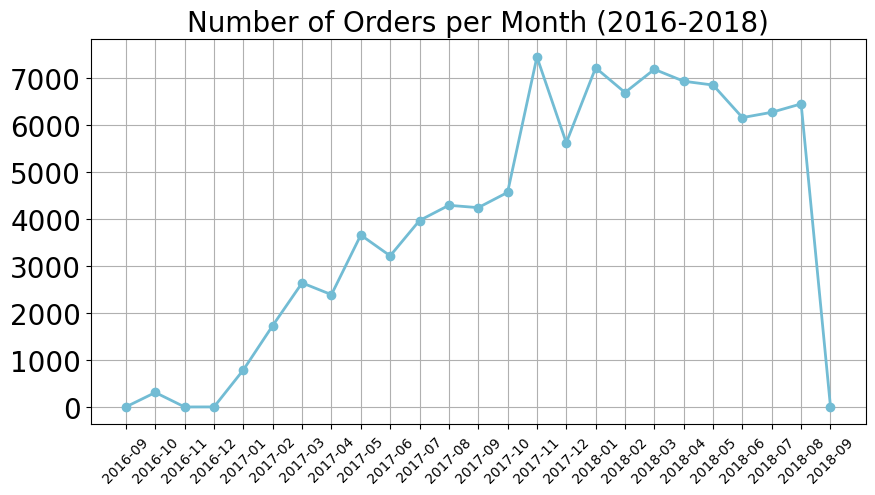

In [94]:
monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

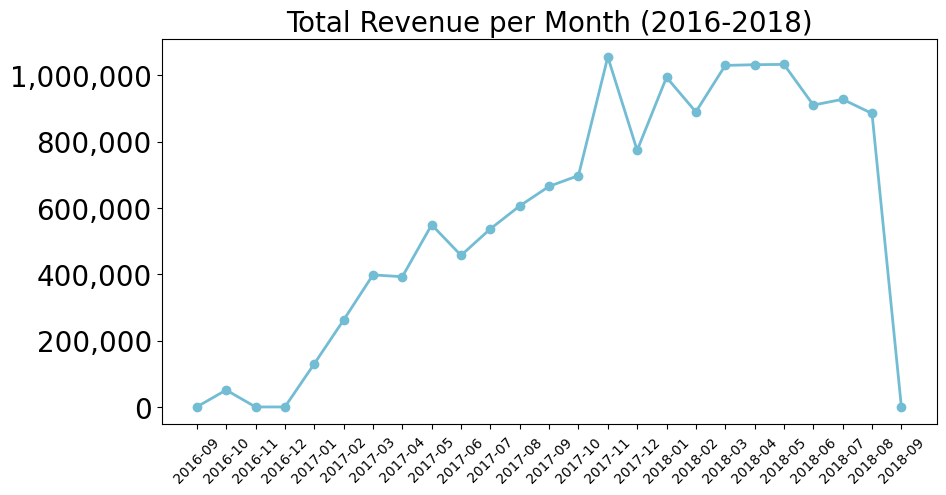

In [95]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72bcd4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=20)

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

From both graphs, we can observe that the number of orders closely aligns with total revenue, as their trends appear similar. Both show a consistent upward growth from 2016 to 2018, with a significant increase in November 2017. However, following this peak, there is a noticeable drop in December 2017, followed by fluctuating growth and a sharp decrease in September 2018.

### Question 2: Which product categories are the best and worst performers in terms of sales revenue?

In [96]:
product_sell_df = all_df.groupby(by='product_category_name').price.sum().sort_values(ascending=False).reset_index()
product_sell_df.head()

,product_category_name,price
0,health_beauty,1301813.00
1,watches_gifts,1254322.95
2,bed_bath_table,1107249.09
3,sports_leisure,1029603.88
4,computers_accessories,950053.69


In [97]:
product_sell_df.tail()

,product_category_name,price
66,flowers,1110.04
67,home_comfort_2,773.17
68,cds_dvds_musicals,730.00
69,fashion_childrens_clothes,569.85
70,security_and_services,283.29


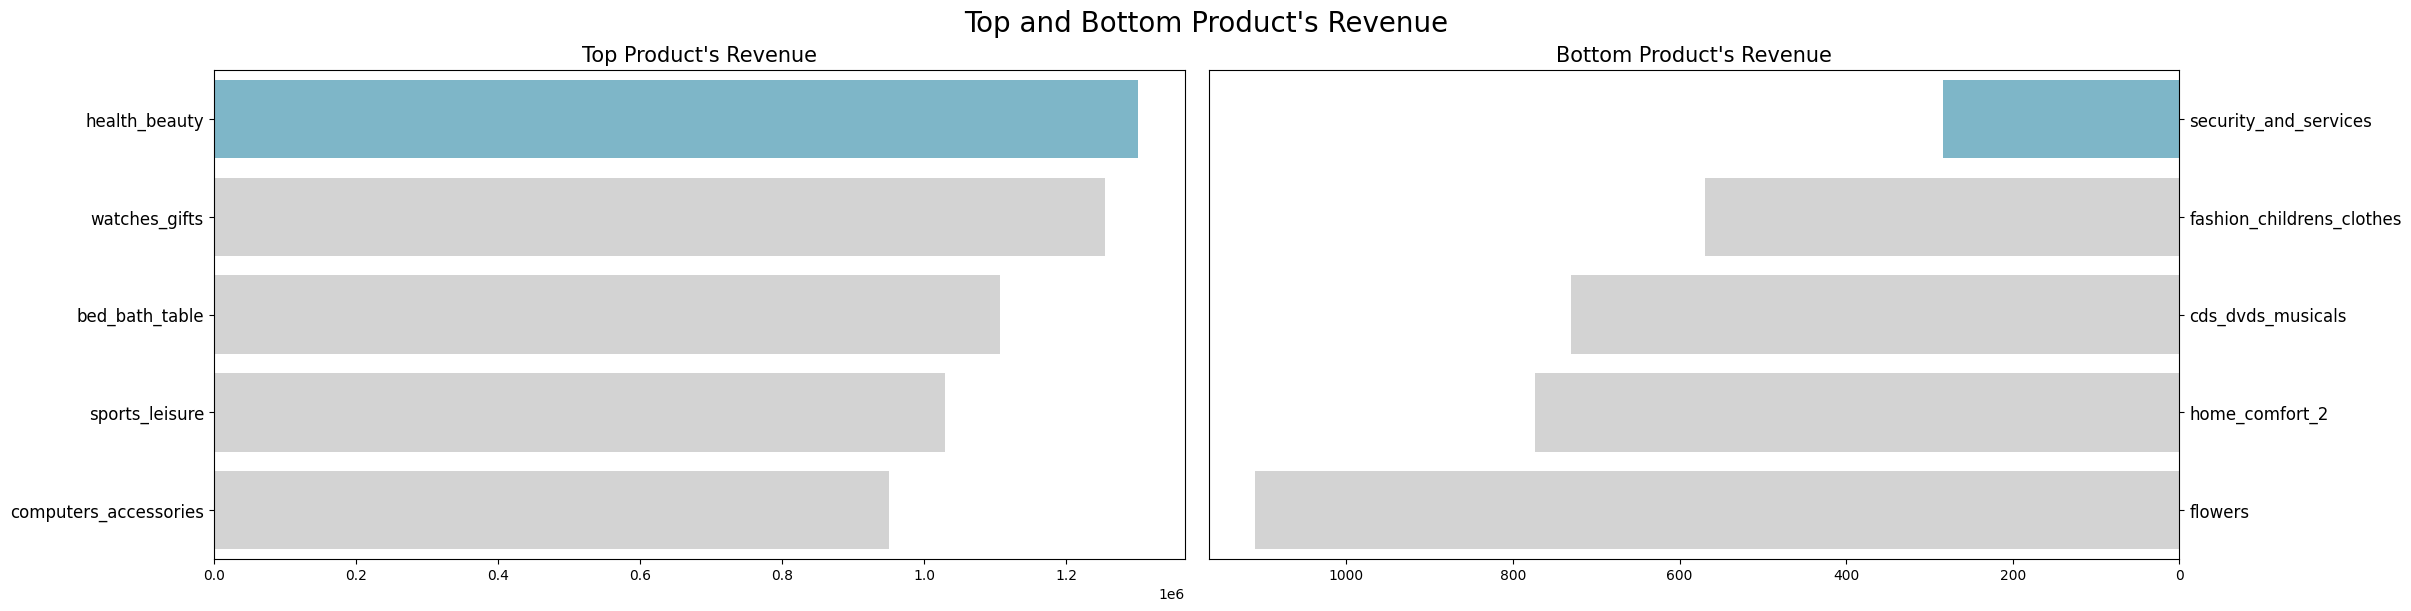

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6), constrained_layout=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="price", y="product_category_name", data=product_sell_df.head(5), palette=colors, hue="product_category_name", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top Product's Revenue", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="price", y="product_category_name", data=product_sell_df.sort_values(by="price", ascending=True).head(5), palette=colors, hue="product_category_name", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom Product's Revenue", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Top and Bottom Product's Revenue", fontsize=20)
plt.show()

The health_beauty category generated the highest revenue at 1,263,138.54, potentially reflecting its high demand as it fulfills primary needs. In contrast, the categories with the lowest revenues were security_and_services (283.29), fashion_childrens_clothes (569.85), and cds_dvds_musicals (730), which are not considered essential. However, the top revenue-generating categories are not limited to primary needs; examples like watches, sports, and computers suggest that pricing, in addition to demand, plays a significant role in their revenue performance.

### Question 3: Which product categories receive the highest and lowest customer review?

In [99]:
based_on_reviews_df = all_df.groupby(by='product_category_name').review_score.mean().sort_values(ascending=False).reset_index()
based_on_reviews_df.head()

,product_category_name,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.438503
3,books_imported,4.419355
4,flowers,4.419355


In [100]:
based_on_reviews_df.tail()

,product_category_name,review_score
66,home_comfort_2,3.642857
67,fashion_male_clothing,3.548611
68,office_furniture,3.526791
69,diapers_and_hygiene,3.256410
70,security_and_services,2.500000


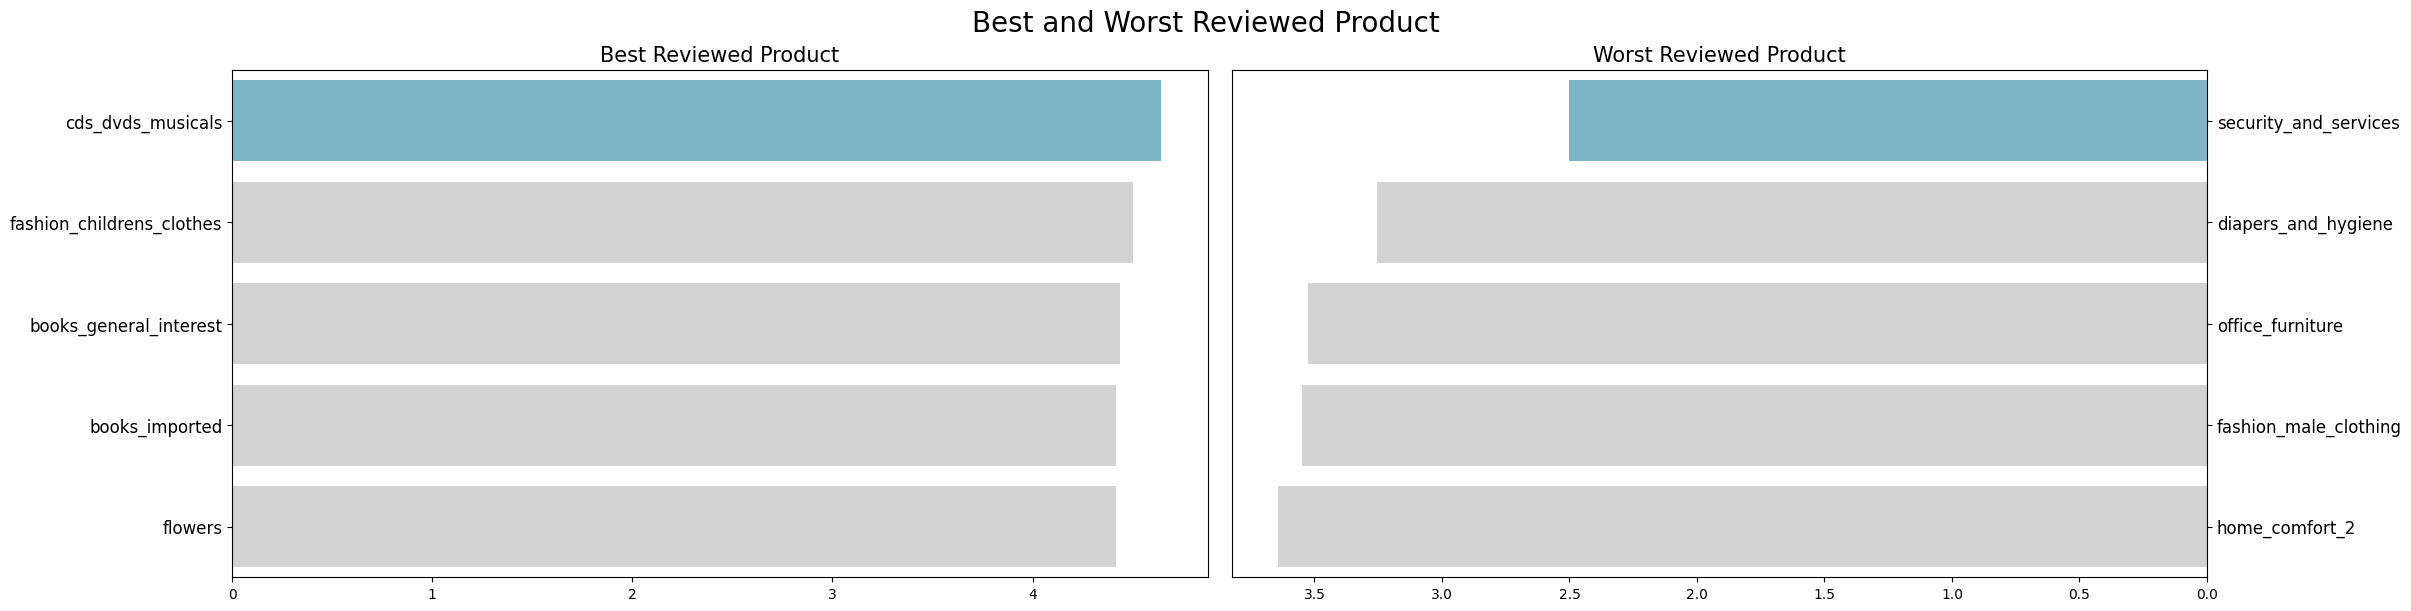

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6), constrained_layout=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name", data=based_on_reviews_df.head(5), palette=colors, hue="product_category_name", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Reviewed Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="review_score", y="product_category_name", data=based_on_reviews_df.sort_values(by="review_score", ascending=True).head(5), palette=colors, hue="product_category_name", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Reviewed Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Reviewed Product", fontsize=20)
plt.show()

cds_dvds_musicals have the best review with 4.6 stars, this could could mean that customers have consistently rated highly, possibly indicating high satisfaction. We can also observe that the 'security_and_services' category has the lowest average review score, with 2.5 stars. It has a noticeable gap of 0.75 stars compared to the second lowest, 'diapers_and_hygiene', which has an average score of 3.25 stars. Additionally, the gap between the second and third lowest categories is smaller, at only 0.24 stars. This could indicate issue in product's quality or services.

### Question 4: What is the geographic distributions of our customers?

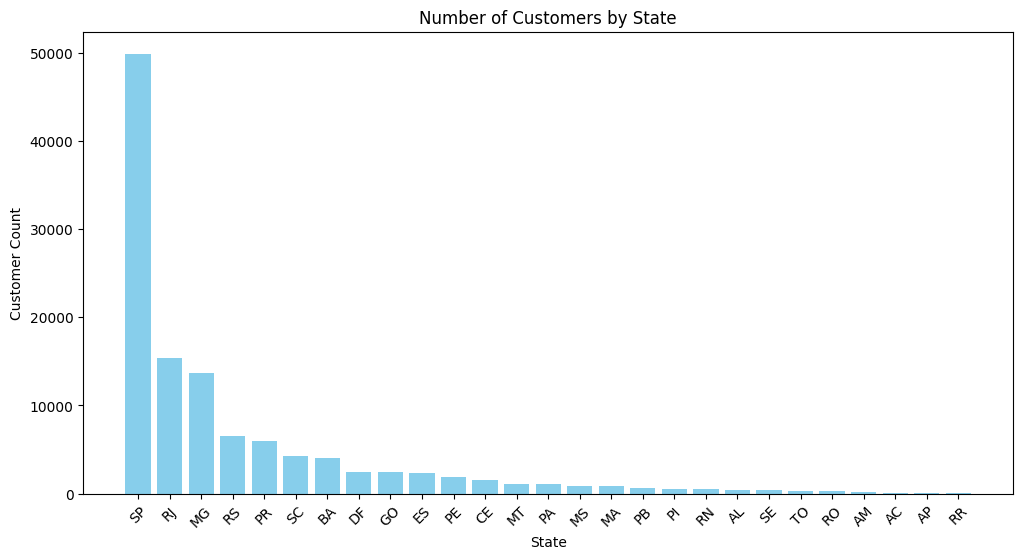

In [145]:
state_counts = all_df["customer_state"].value_counts().reset_index()
state_counts.columns = ["State", "Customer Count"]

plt.figure(figsize=(12, 6))
plt.bar(state_counts["State"], state_counts["Customer Count"], color="skyblue")
plt.title("Number of Customers by State")
plt.xlabel("State")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()

Customerdistribution is concentrated in SP. There is also a big drop on the second state RJ. Most of the state, have significantly lower counts compared to SP.

### Question 5: How are our customers distributed based on their payment type? And what is the average installments from customers who used credit card?

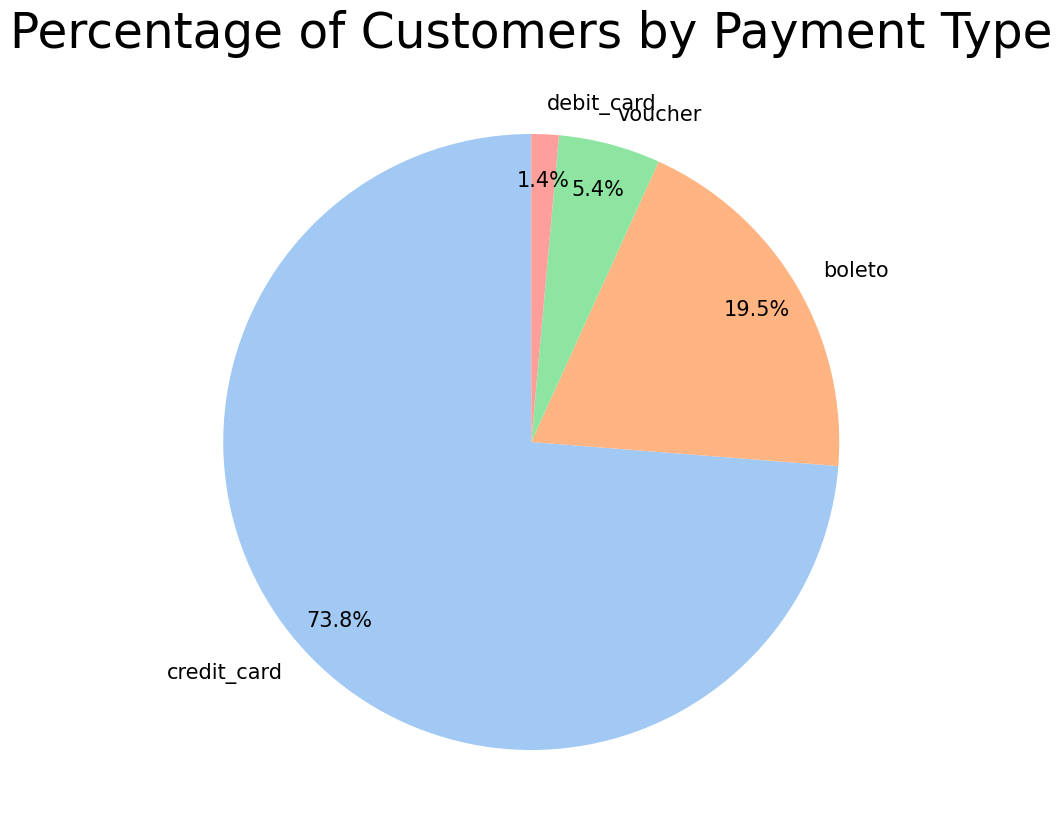

In [106]:
paytype_counts = all_df["payment_type"].value_counts().reset_index()
paytype_counts.columns = ["Payment Type", "Customer Count"]

fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(
    paytype_counts["Customer Count"],
    labels=paytype_counts["Payment Type"],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 15} ,
    pctdistance=0.85
)
ax.set_title("Percentage of Customers by Payment Type", fontsize=35)
plt.show()

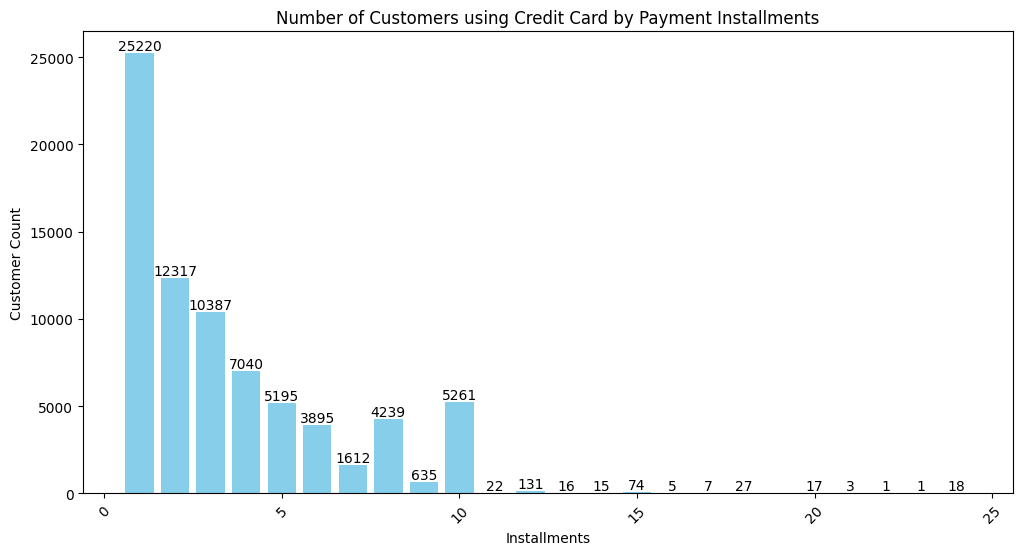

In [121]:
installments_df = all_df[all_df['payment_type'] == 'credit_card'].groupby('payment_installments')['order_id'].nunique().sort_values(ascending=False).reset_index()
installments_df.columns = ['Installments', 'Customer Count']

plt.figure(figsize=(12, 6))
bars = plt.bar(installments_df["Installments"], installments_df["Customer Count"], color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Customers using Credit Card by Payment Installments")
plt.xlabel("Installments")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()

The majority of customers prefer using credit cards for their purchases, 73.8% of transactions, while the least preferred payment method is debit cards. Among those using credit cards, most chose for a one-time payment, with 25220 customers. The highest nuber of installments, 24, was chosen by just 18 customers.

### Question 6: What is the distribution of our order status and how many percent is the cancelation rate over all orders?

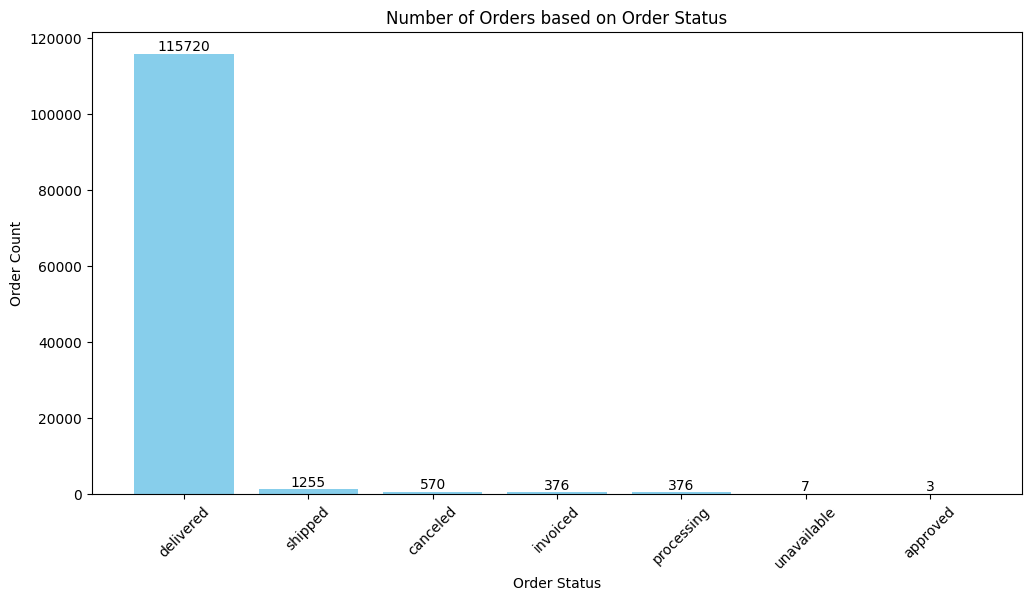

In [122]:
ordstatus_counts = all_df["order_status"].value_counts().reset_index()
ordstatus_counts.columns = ["Order Status", "Order Count"]

plt.figure(figsize=(12, 6))
bars = plt.bar(ordstatus_counts["Order Status"], ordstatus_counts["Order Count"], color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Orders based on Order Status")
plt.xlabel("Order Status")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()

In [139]:
canceled_counts = all_df[all_df["order_status"] == "canceled"].shape[0]
print("Cancelation Rate (Overall Orders):", round(canceled_counts/all_df.shape[0],4))

Cancelation Rate (Overall Orders): 0.0048


Among all the orders, the majority have been delivered with a total of 115720. However, there are 570 canceled orders which resulted in 0.0048 cancelation rate.

### Question 7: What is the delivery time spread of our delivered-orders?

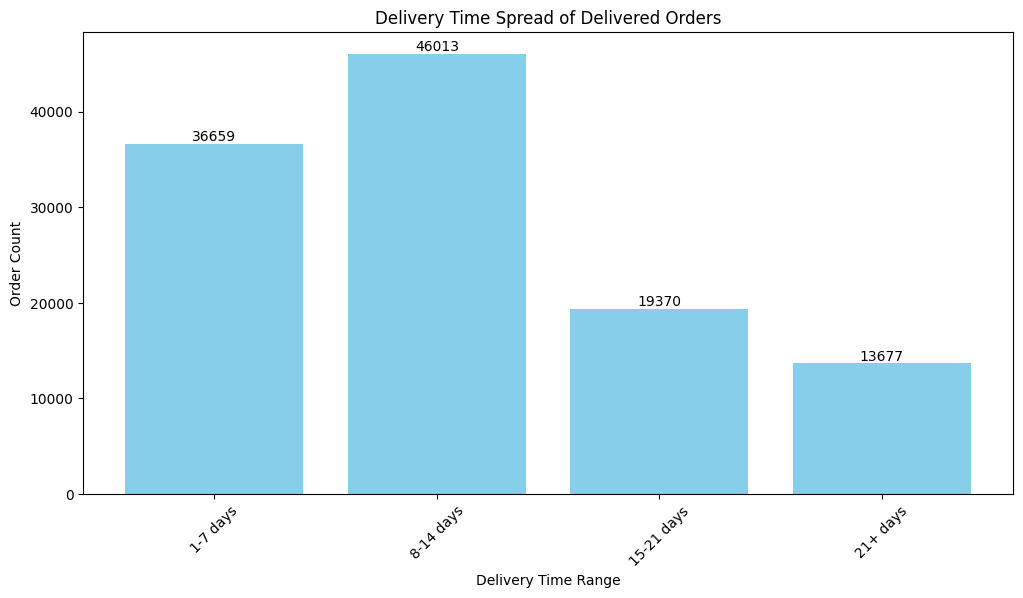

In [140]:
delivery_time_order = ['1-7 days', '8-14 days', '15-21 days', '21+ days']

deltime_counts = all_df["delivery_time_range"].value_counts().reindex(delivery_time_order).reset_index()
deltime_counts.columns = ["Delivery Time Range", "Order Count"]

plt.figure(figsize=(12, 6))
plt.title('Delivery Time Spread of Delivered Orders')
bars = plt.bar(deltime_counts['Delivery Time Range'], deltime_counts['Order Count'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Delivery Time Range')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

Most orders were delivered within 8-14 days, with a total of 46,013 orders. The second-highest number of deliveries occurred within 1-7 days, followed by 15-21 days. Additionally, 13,667 orders were delivered in more than 21 days.

### **Insight:**

**Order and Revenue Trends**
- The number of orders and total revenue share a similar trend, reflecting consistent growth from 2016 to 2018, with a peak in November 2017. However, there is a significant drop in December 2017, followed by fluctuations and a sharp decline in September 2018.

**Revenue by Category**
- The health_beauty category generated the highest revenue (1,263,138.54), likely due to high demand as it caters to essential needs.
- Categories such as security_and_services, fashion_childrens_clothes, and cds_dvds_musicals had the lowest revenues, reflecting lower demand or non-essential status.
- Revenue performance in non-essential categories like watches, sports, and computers suggests that pricing and demand significantly influence revenue.

**Product Review**
- The cds_dvds_musicals category stands out with the highest average review score of 4.6 stars, indicating strong customer satisfaction.
- In contrast, security_and_services has the lowest average review score of 2.5 stars, highlighting potential issues in product quality or services.
- There is a significant gap of 0.75 stars between the lowest and second-lowest rated category (diapers_and_hygiene, 3.25 stars), suggesting greater dissatisfaction with security_and_services.

**Customer Geographic Distribution**
- Customer distributions is heavily concentrated in the state of Sao Paulo (SP).
- A sharp drop is observed in the second-highest states RJ.
Most other states have significantly lower counts of customers compared to SP.

**Customer Payment Type Distribution and Installments Counts for Credit Card users**
- The majority of customers prefer using credit cards for their purchases, 73.8% of transactions, while the least preferred payment method is debit cards.
- Among those using credit cards, most chose for a one-time payment, with 25220 customers. The highest nuber of installments, 24, was chosen by just 18 customers.

**Orders Distribution based on their Status; Cancelation Rate**
- Among all the orders, the majority have been delivered with a total of 115720. However, there are 570 canceled orders which resulted in 0.0048 cancelation rate.

**Delivery Time Spread of Delivered Orders**
- Most orders were delivered within 8-14 days, with a total of 46,013 orders. The second-highest number of deliveries occurred within 1-7 days, followed by 15-21 days. Additionally, 13,667 orders were delivered in more than 21 days.

## Further Analysis

### RFM Analysis

In [141]:
rfm_df = merged_5_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp" : "max" , # get the last order date
    "order_id": "nunique", # calculate order sum
    "price" : "sum" # calculate the amount of revenue generated
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df['customer_id'] = range(1, len(rfm_df) + 1)

# calculate when the customer last made a transaction (day)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = merged_5_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head(15)

,customer_id,frequency,monetary,recency
0,1,1,129.90,116
1,2,1,18.90,119
2,3,1,69.00,542
3,4,1,25.99,326
4,5,1,180.00,293
5,6,1,154.00,151
6,7,1,27.99,136
7,8,1,382.00,187
8,9,1,135.00,548
9,10,1,104.90,175


<ipython-input-142-3d39900bb0ce>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="recency", ax=ax[0])
<ipython-input-142-3d39900bb0ce>:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="frequency", ax=ax[1])


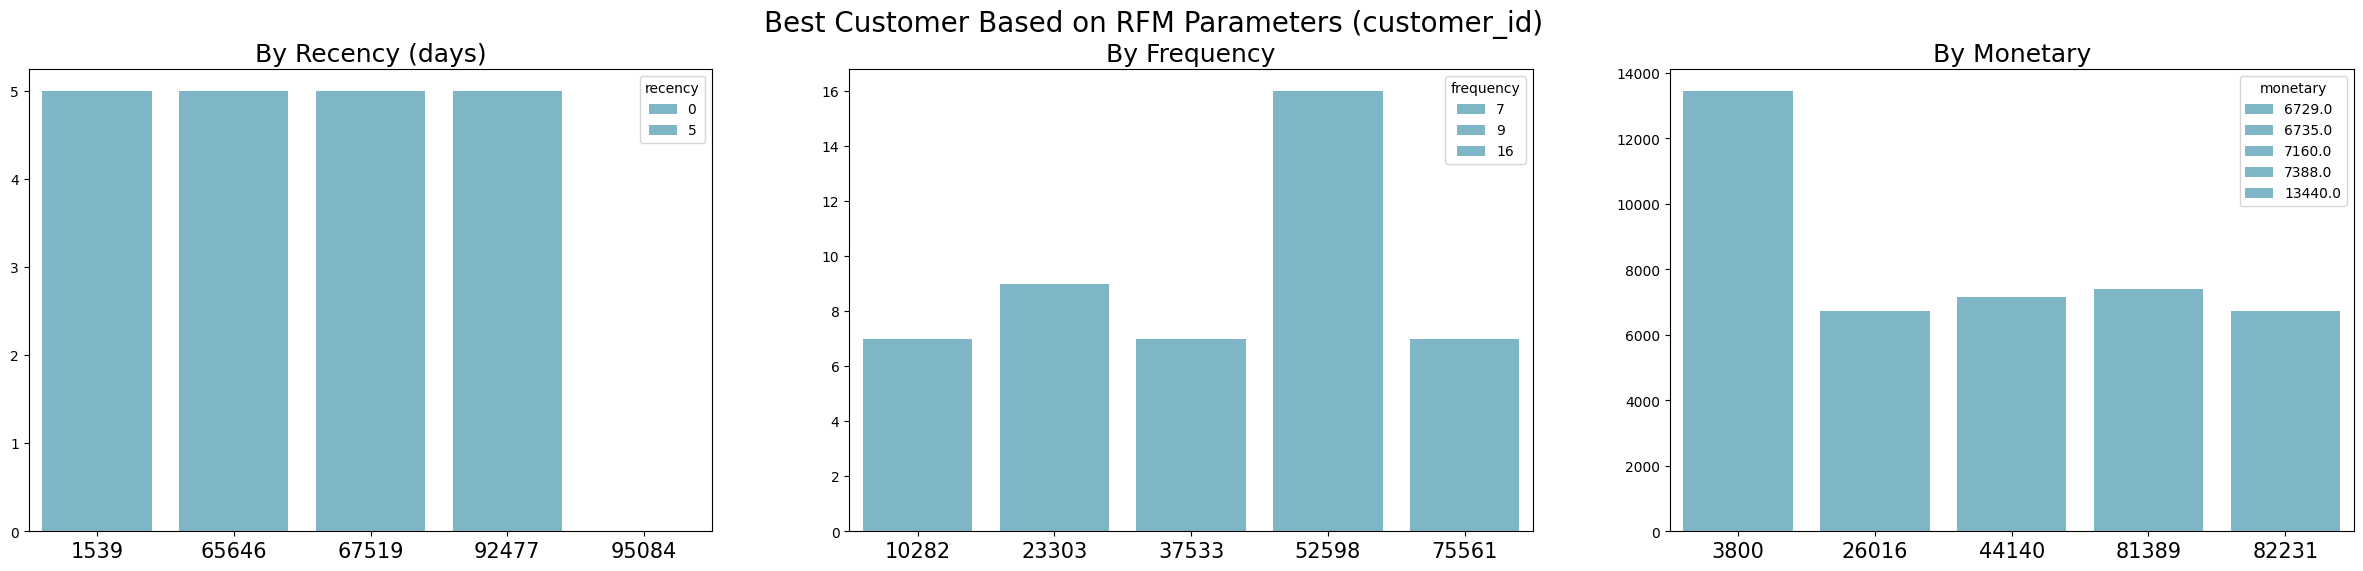

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="recency", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="frequency", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="monetary", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

- Recency: Most customers have relatively low recency value of 5. Other than that there's one customer with value of 0. These mean that these customers have made purchases recently, it could indicate that they are active customers.
- Frequency: Customer 52598 has made 16 purchases, more frequent compared to others. The other customers have fewer transactions, which could imply they are less active or made fewer purchases.
- Monetary: Customer 3800 has spent more money 13440 compared to the other customers, suggesting that this customer is a high-value customer in terms of monetary contribution.

## Save all_df to csv

In [143]:
dropped = all_df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'seller_id', 'freight_value', 'review_id', 'review_creation_date', 'review_answer_timestamp', 'customer_zip_code_prefix', 'payment_value'], axis=1)

all_df.to_csv('ecommerce_data.csv', index=False)

## Conclusion

- Revenue showed consistent growth, peaking sharply in November 2017, followed by a decline in December 2017 and fluctuating growth thereafter.
- The cds_dvds_musicals category received the highest average review score (4.6 stars), while security_and_services had the lowest (2.5 stars), indicating potential quality or service issues.
- The health_beauty category generated the highest revenue, highlighting its strong demand, while categories like security_and_services had minimal sales due to lower demand. However, pricing could also influence sales performance.
- São Paulo (SP) is the dominant state of the customers with significantly lower distribution in other states.
- Customers payment type distribution shows most of them prefer using credit cards (73.8% of transactions), with the majority choosing a one-time payments, while the least preferred payment method is debit cards, and only 18 customers chose the maximum of 24 installments.
- The majority of orders' status were delivered (115,720), with 570 canceled orders resulting in a cancellation rate of 0.0048.
- Most orders were delivered in 8-14 days, totaling 46,013, followed by deliveries in 1-7 days, 15-21 days, and 13,667 orders delivered in more than 21 days.